In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from func_preprocesamiento import acotar_caracteristicas

In [3]:
df = pd.read_csv('../Dataset/raw/alquiler_AMBA_dev.csv')
df = acotar_caracteristicas(df)
df.to_csv('../Dataset/raw/alquiler_AMBA_dev_lim.csv', index=False)

X = df.drop(columns=['precio_pesos_constantes', 'precio_por_m2']) 
y = df['precio_pesos_constantes']  

y_bins = pd.qcut(y, q=5, labels=False)              
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y_bins
)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
print('a\n')
train_data.to_csv('../Dataset/raw/dev_lim.csv', index=False)
test_data.to_csv('../Dataset/raw/test_lim.csv', index=False)

/tmp/ipykernel_89946/1412941009.py:1: DtypeWarning: Columns (8,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/raw/alquiler_AMBA_dev.csv')
/home/camila/Escritorio/ML/proyecto_final_Guerrero_Russi/src/func_preprocesamiento.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precio_por_m2'] = df['precio_pesos_constantes'] / df['SConstrM2']


a



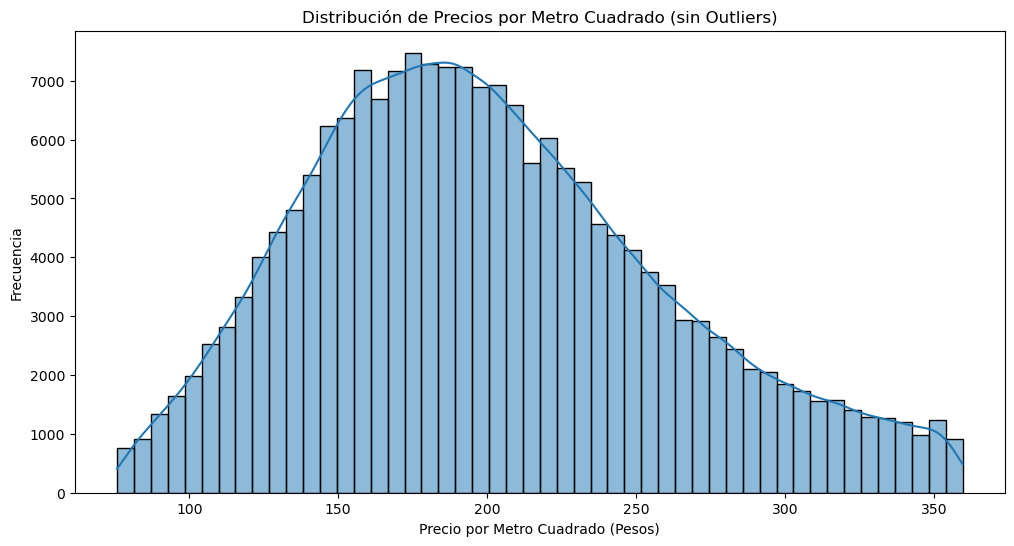

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de los nuevos valores
plt.figure(figsize=(12, 6))
sns.histplot(df['precio_por_m2'], bins=50, kde=True)
plt.title('Distribución de Precios por Metro Cuadrado (sin Outliers)')
plt.xlabel('Precio por Metro Cuadrado (Pesos)')
plt.ylabel('Frecuencia')
plt.show()